In [21]:
import os
import random
from IPython.display import Audio
import librosa
import librosa.display

In [6]:
MSD = '/mnt/disks/msd/audio/A/A/A'

In [7]:
mp3_files = []

# Walk through the directory tree starting at the root directory
for dirpath, dirnames, filenames in os.walk(MSD):
    for filename in filenames:
        # Check if the file extension is .mp3
        if filename.endswith(".mp3"):
            # Print the full path to the file
            mp3_files.append(os.path.join(dirpath, filename))

In [8]:
# Select a random file from the mp3_files list
random_file = random.choice(mp3_files)

# Play the random file using IPython.display.Audio
Audio(random_file, autoplay=True)

In [25]:
sr = 44100 # replace with your desired sample rate

if sr == 44100:
    JND = 220
    max_sect = 441000
elif sr == 22050:
    JND = 110
    max_sect = 2205000
else:
    raise ValueError("Unsupported sample rate")

print(f"Sample rate: {sr} Hz")
print(f"JND: {JND} samples = {JND/sr:.3f} seconds")
print(f"Maximum section: {max_sect} samples = {max_sect/sr:.3f} seconds")

Sample rate: 44100 Hz
JND: 220 samples = 0.005 seconds
Maximum section: 441000 samples = 10.000 seconds


In [14]:
y, sr = librosa.load(random_file, sr=None)

/opt/conda/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [15]:
spectral_flux = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)

In [18]:
onset_frames = librosa.util.peak_pick(spectral_flux, pre_max = 3, post_max = 3, pre_avg = 3, post_avg = 5, delta = 0.5, wait = JND)
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=512)

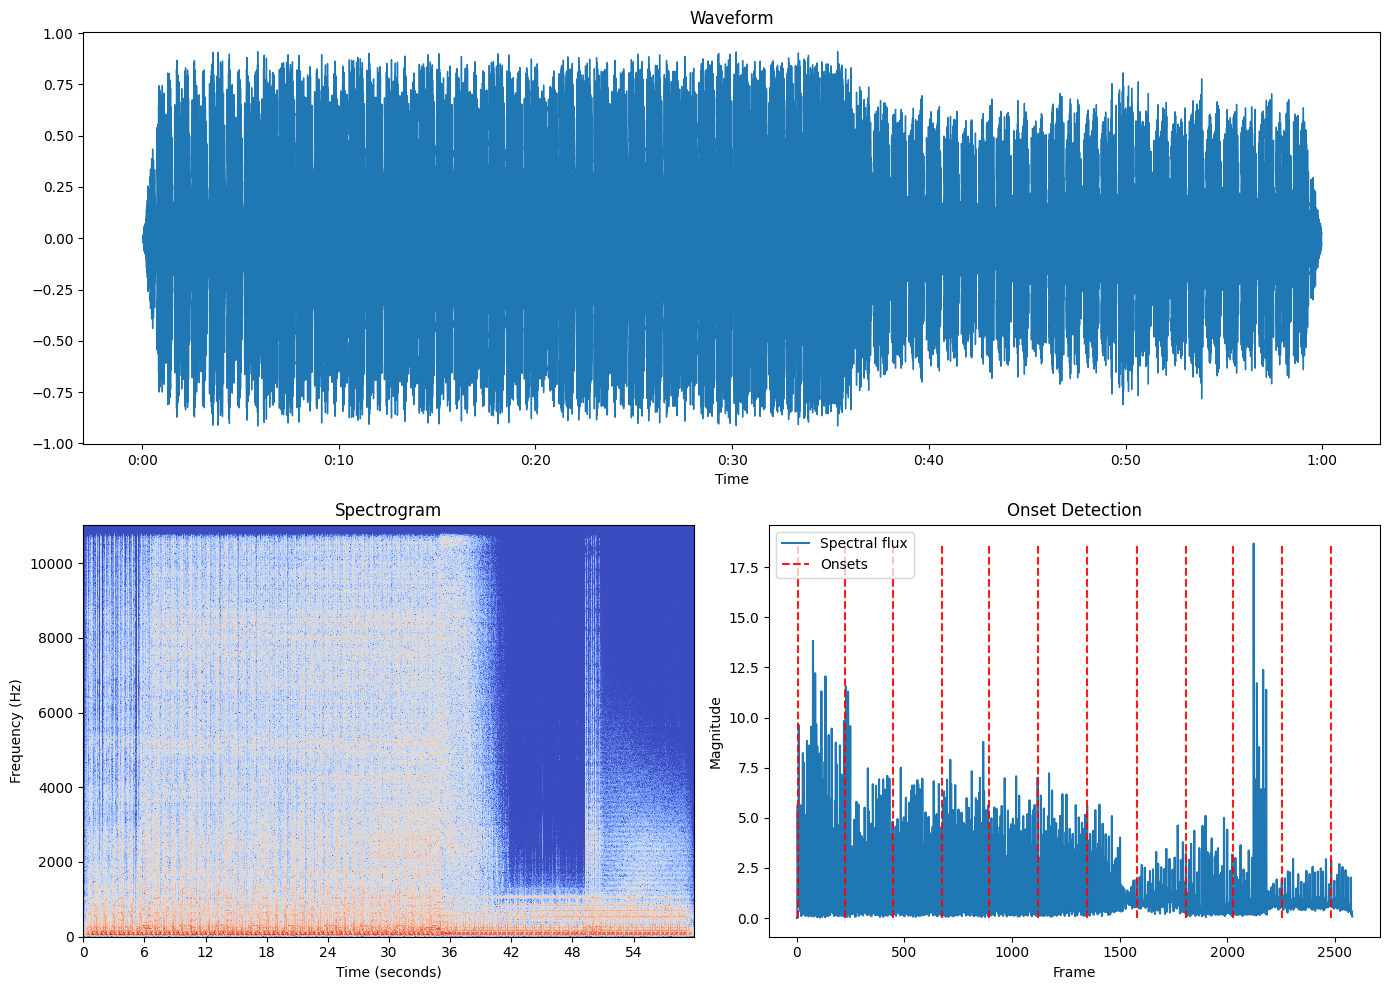

In [24]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a 2x2 grid of subplots
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2)

# Plot waveform in first subplot
ax1 = fig.add_subplot(gs[0, :])
librosa.display.waveshow(y, sr=sr, ax=ax1)
ax1.set_title('Waveform')

# Compute and plot spectrogram in second subplot
ax2 = fig.add_subplot(gs[1, 0])
spec = librosa.stft(y)
mag_spec = librosa.amplitude_to_db(abs(spec))
librosa.display.specshow(mag_spec, sr=sr, x_axis='time', y_axis='hz', ax=ax2)
ax2.set_title('Spectrogram')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Frequency (Hz)')

# Plot onset detection results in third subplot
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(spectral_flux, label='Spectral flux')
ax3.vlines(onset_frames, 0, spectral_flux.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
ax3.set_title('Onset Detection')
ax3.set_xlabel('Frame')
ax3.set_ylabel('Magnitude')
ax3.legend(frameon=True, framealpha=0.75)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()